# Car price

## Imports

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

np.set_printoptions(suppress=True)
pd.set_option('display.float_format', lambda x: '%.3f' % x)
sns.set_theme()

## Read data

In [2]:
df = pd.read_csv("../data/car_price_dataset.csv")
df.shape

(10000, 10)

In [3]:
df.head()

,Brand,Model,Year,Engine_Size,Fuel_Type,Transmission,Mileage,Doors,Owner_Count,Price
0,Kia,Rio,2020,4.200,Diesel,Manual,289944,3,5,8501
1,Chevrolet,Malibu,2012,2.000,Hybrid,Automatic,5356,2,3,12092
2,Mercedes,GLA,2020,4.200,Diesel,Automatic,231440,4,2,11171
3,Audi,Q5,2023,2.000,Electric,Manual,160971,2,1,11780
4,Volkswagen,Golf,2003,2.600,Hybrid,Semi-Automatic,286618,3,3,2867


## Analysis

In [4]:
df.describe()

,Year,Engine_Size,Mileage,Doors,Owner_Count,Price
count,10000.000,10000.000,10000.000,10000.000,10000.000,10000.000
mean,2011.544,3.001,149239.112,3.497,2.991,8852.964
std,6.898,1.149,86322.349,1.110,1.423,3112.597
min,2000.000,1.000,25.000,2.000,1.000,2000.000
25%,2006.000,2.000,74649.250,3.000,2.000,6646.000
50%,2012.000,3.000,149587.000,3.000,3.000,8858.500
75%,2017.000,4.000,223577.500,4.000,4.000,11086.500
max,2023.000,5.000,299947.000,5.000,5.000,18301.000


In [5]:
df.isna().sum()

Brand           0
Model           0
Year            0
Engine_Size     0
Fuel_Type       0
Transmission    0
Mileage         0
Doors           0
Owner_Count     0
Price           0
dtype: int64

### Univariate

In [6]:
df["Brand"].value_counts()

Brand
Ford          1048
Audi          1038
Volkswagen    1020
Honda         1009
Chevrolet     1003
BMW            999
Hyundai        995
Kia            976
Toyota         970
Mercedes       942
Name: count, dtype: int64

In [7]:
df["Brand"].value_counts(normalize=True)

Brand
Ford         0.105
Audi         0.104
Volkswagen   0.102
Honda        0.101
Chevrolet    0.100
BMW          0.100
Hyundai      0.100
Kia          0.098
Toyota       0.097
Mercedes     0.094
Name: proportion, dtype: float64

In [8]:
df["Year"].value_counts().sort_index().head()

Year
2000    393
2001    406
2002    462
2003    381
2004    394
Name: count, dtype: int64

#### Graphs

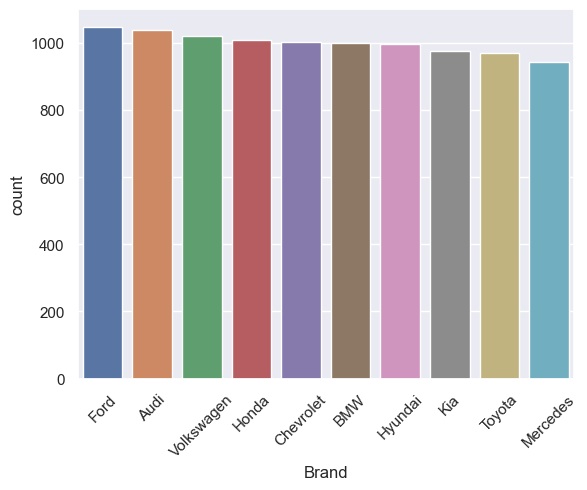

In [9]:
gp = df["Brand"].value_counts()
gp = gp.reset_index()

sns.barplot(data=gp, x="Brand", y="count")

plt.xticks(rotation=45);

plt.show()
# plt.savefig('ex.png', dpi=200, bbox_inches='tight')

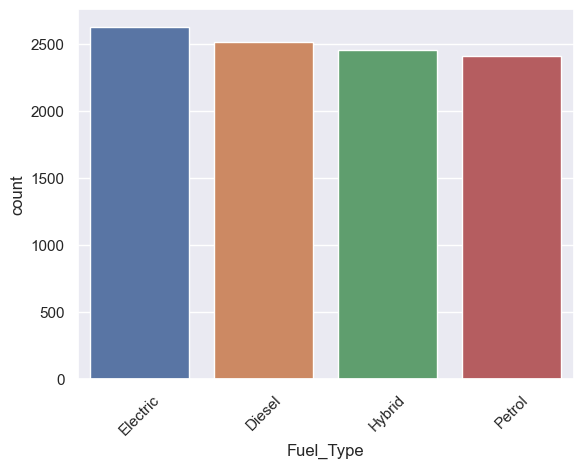

In [10]:
gp = df["Fuel_Type"].value_counts()
gp = gp.reset_index()

sns.barplot(data=gp, x="Fuel_Type", y="count")

plt.xticks(rotation=45);

plt.show()
# plt.savefig('ex.png', dpi=200, bbox_inches='tight')

### Bivariate

In [11]:
df.groupby("Brand").agg({"Price": ["min", "mean", "median", "max"]})

Price                         
             min     mean   median    max
Brand                                    
Audi        2000 8929.374 8917.000  18255
BMW         2000 8704.068 8741.000  17386
Chevrolet   2000 9015.684 9038.000  17661
Ford        2000 8852.571 8775.500  18017
Honda       2000 8665.597 8624.000  17906
Hyundai     2000 8778.279 8755.000  17871
Kia         2000 8880.086 8914.000  17630
Mercedes    2000 8980.087 9142.000  17614
Toyota      2000 8798.185 8726.000  18301
Volkswagen  2000 8928.377 8976.000  16461

#### Graphs

In [12]:
gp = df.groupby("Brand").agg(max=("Mileage", "max"))
gp.reset_index(inplace=True)
gp

,Brand,max
0,Audi,299714
1,BMW,299371
2,Chevrolet,299947
3,Ford,299652
4,Honda,299818
5,Hyundai,299626
6,Kia,298476
7,Mercedes,299287
8,Toyota,299872
9,Volkswagen,299016


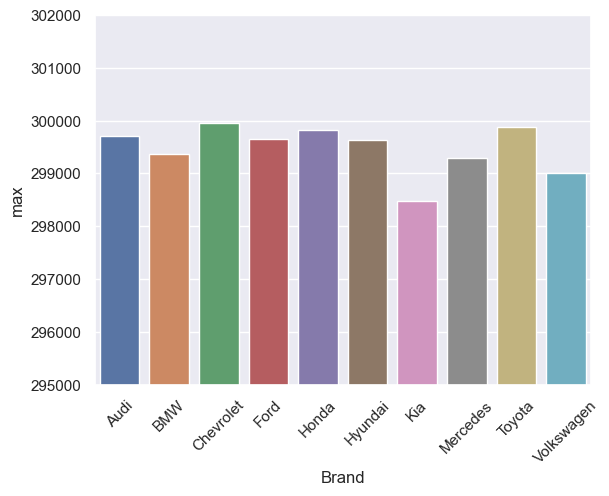

In [13]:
sns.barplot(gp, x="Brand", y="max")

plt.ylim(295000, 302000)

plt.xticks(rotation=45);

plt.show()
# plt.savefig('ex.png', dpi=200, bbox_inches='tight')

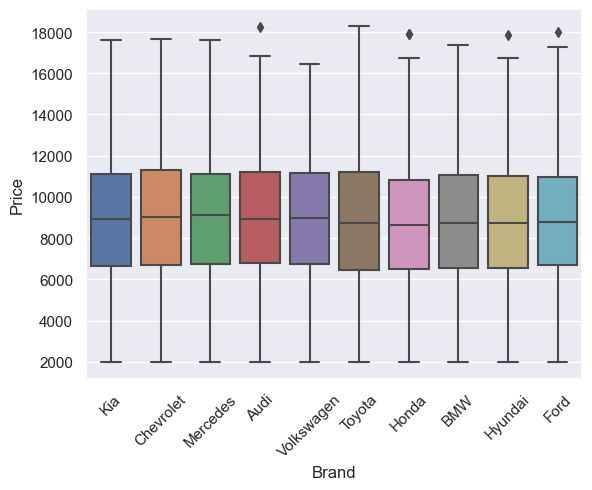

In [14]:
sns.boxplot(df, x='Brand', y='Price')

plt.xticks(rotation=45);

plt.show()
# plt.savefig('ex.png', dpi=200, bbox_inches='tight')

In [15]:
gp = df.groupby(["Year", "Brand"]).agg(mean=("Price", "mean"))
gp.reset_index(inplace=True)
gp

,Year,Brand,mean
0,2000,Audi,5538.143
1,2000,BMW,5061.326
2,2000,Chevrolet,4783.433
3,2000,Ford,5082.946
4,2000,Honda,5872.273
...,...,...,...
235,2023,Hyundai,12279.023
236,2023,Kia,12205.639
237,2023,Mercedes,12198.098
238,2023,Toyota,11993.907


<Axes: xlabel='Year', ylabel='mean'>

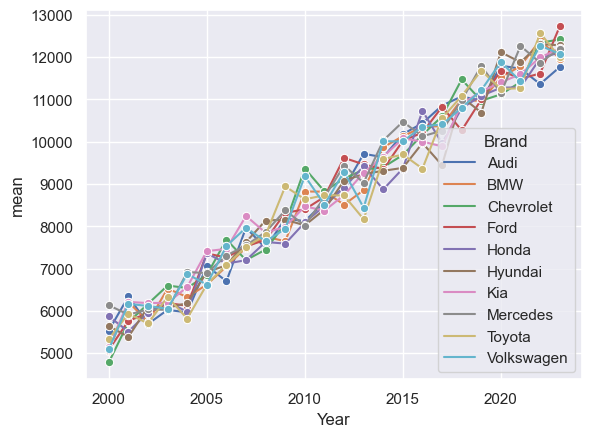

In [16]:
sns.lineplot(gp, x="Year", y="mean", hue="Brand", marker="o")

In [17]:
gp_asia = gp[gp["Brand"].isin(["Honda", "Hyundai", "Kia", "Toyota"])]

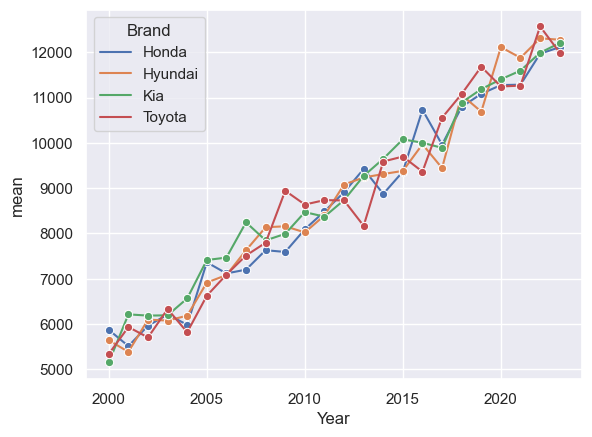

In [18]:
sns.lineplot(gp_asia, x="Year", y="mean", hue="Brand", marker="o")

plt.show()
# plt.savefig('ex.png', dpi=200, bbox_inches='tight')

In [19]:
gp = df.groupby(["Year", "Brand"]).agg(mean=("Price", "mean")) / df.groupby(["Year"]).agg(mean=("Price", "mean"))
gp.reset_index(inplace=True)
gp

,Year,Brand,mean
0,2000,Audi,1.027
1,2000,BMW,0.938
2,2000,Chevrolet,0.887
3,2000,Ford,0.942
4,2000,Honda,1.089
...,...,...,...
235,2023,Hyundai,1.009
236,2023,Kia,1.003
237,2023,Mercedes,1.002
238,2023,Toyota,0.986


In [20]:
gp_asia = gp[gp["Brand"].isin(["Honda", "Hyundai", "Kia", "Toyota"])]

<Axes: xlabel='Year', ylabel='mean'>

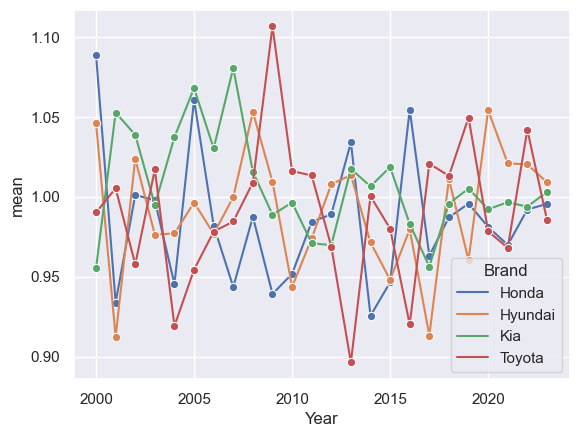

In [21]:
sns.lineplot(gp_asia, x="Year", y="mean", hue="Brand", marker="o")

<Axes: xlabel='Year', ylabel='count'>

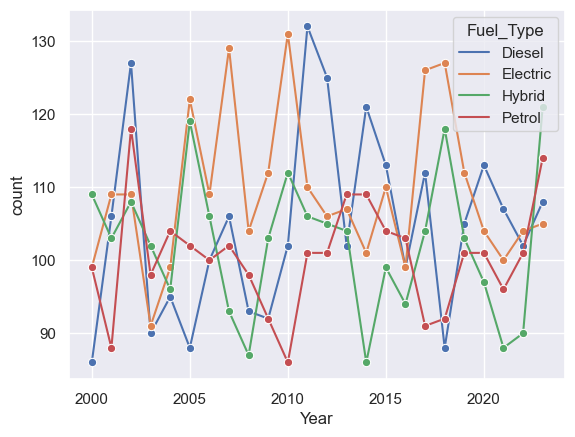

In [22]:
gp = df.groupby(["Year", "Fuel_Type"]).agg(count=("Fuel_Type", "count"))
gp.reset_index()

sns.lineplot(gp, x="Year", y="count", hue="Fuel_Type", marker="o")

In [23]:
df.head()

,Brand,Model,Year,Engine_Size,Fuel_Type,Transmission,Mileage,Doors,Owner_Count,Price
0,Kia,Rio,2020,4.200,Diesel,Manual,289944,3,5,8501
1,Chevrolet,Malibu,2012,2.000,Hybrid,Automatic,5356,2,3,12092
2,Mercedes,GLA,2020,4.200,Diesel,Automatic,231440,4,2,11171
3,Audi,Q5,2023,2.000,Electric,Manual,160971,2,1,11780
4,Volkswagen,Golf,2003,2.600,Hybrid,Semi-Automatic,286618,3,3,2867


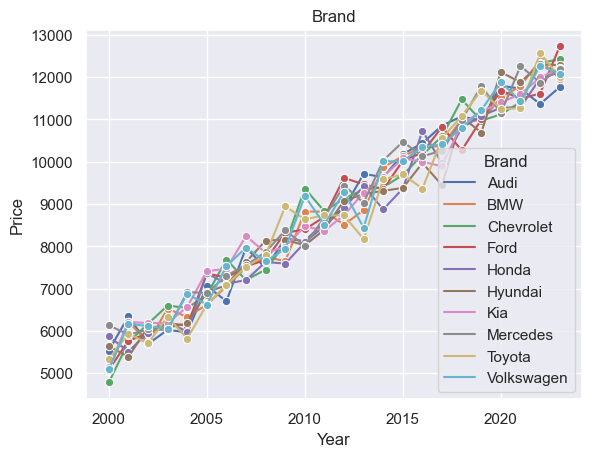

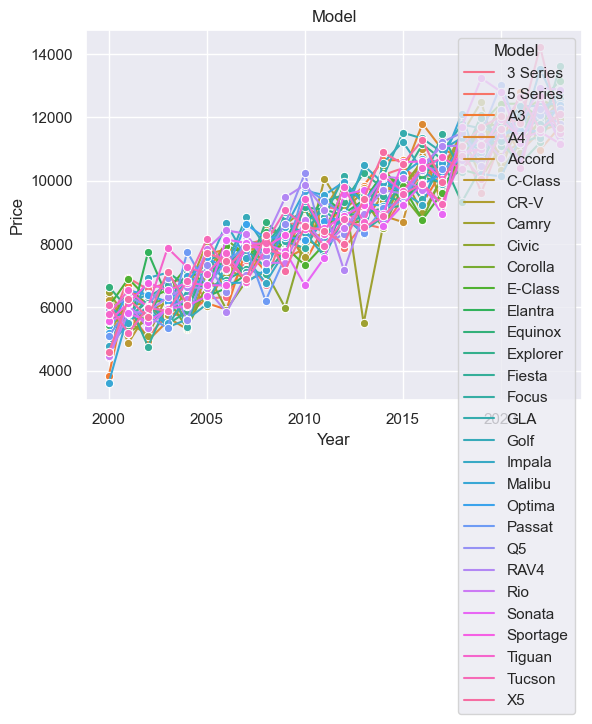

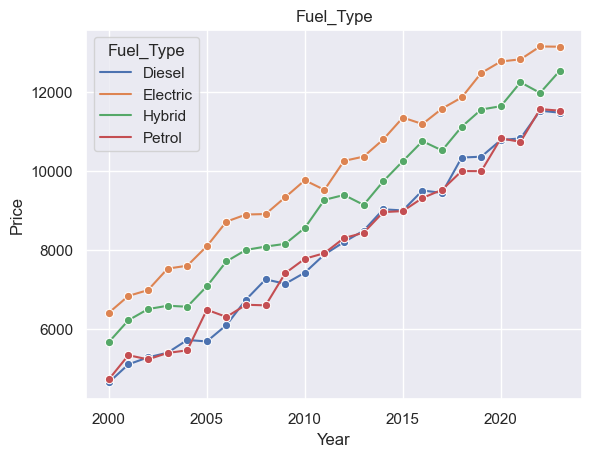

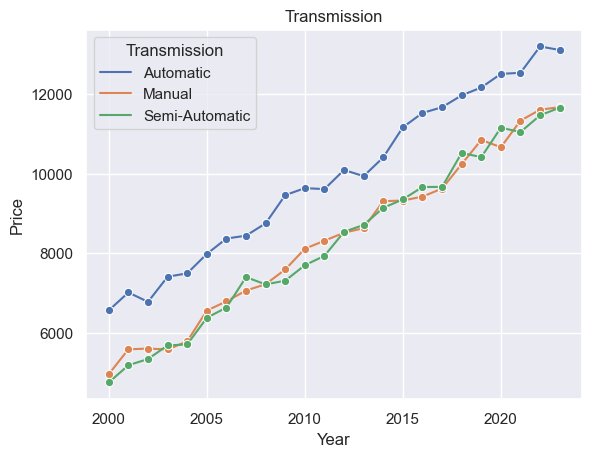

In [24]:
cat_cols = df.select_dtypes(exclude='number').columns

for col in cat_cols:
    gp = df.groupby(["Year", col])["Price"].mean()
    gp = gp.reset_index()

    plt.clf()
    sns.lineplot(gp, x="Year", y="Price", hue=col, marker='o')
    plt.title(col)

    plt.show()
    # plt.savefig(f'ex_{col}.png', dpi=200, bbox_inches='tight')

In [25]:
num_cols = df.select_dtypes(include='number').columns

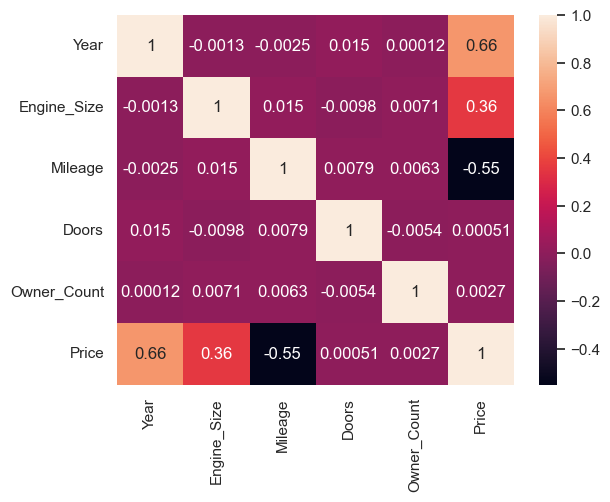

In [26]:
corr = df[num_cols].corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values,
            annot=True)

plt.show()
# plt.savefig('ex.png', dpi=200, bbox_inches='tight')

## Feature engineering and selection

In [27]:
df.head()

,Brand,Model,Year,Engine_Size,Fuel_Type,Transmission,Mileage,Doors,Owner_Count,Price
0,Kia,Rio,2020,4.200,Diesel,Manual,289944,3,5,8501
1,Chevrolet,Malibu,2012,2.000,Hybrid,Automatic,5356,2,3,12092
2,Mercedes,GLA,2020,4.200,Diesel,Automatic,231440,4,2,11171
3,Audi,Q5,2023,2.000,Electric,Manual,160971,2,1,11780
4,Volkswagen,Golf,2003,2.600,Hybrid,Semi-Automatic,286618,3,3,2867


### Mix

In [28]:
df["Brand_Model"] = df["Brand"] + "_" + df["Model"]

In [29]:
df["Brand_Model"].head()

0             Kia_Rio
1    Chevrolet_Malibu
2        Mercedes_GLA
3             Audi_Q5
4     Volkswagen_Golf
Name: Brand_Model, dtype: object

### Binning

In [30]:
df["Year_cat"], bins = pd.qcut(df["Year"], 4, labels=False, retbins=True)
bins

array([2000., 2006., 2012., 2017., 2023.])

In [31]:
df["Mileage_cat"], bins = pd.qcut(df["Mileage"], 10, labels=False, retbins=True)
bins

array([    25. ,  29586.5,  59307. ,  89633.6, 119878.2, 149587. ,
       179242.4, 208518. , 238265.6, 269373.4, 299947. ])

### Select

In [32]:
df.head()

,Brand,Model,Year,Engine_Size,Fuel_Type,Transmission,Mileage,Doors,Owner_Count,Price,Brand_Model,Year_cat,Mileage_cat
0,Kia,Rio,2020,4.200,Diesel,Manual,289944,3,5,8501,Kia_Rio,3,9
1,Chevrolet,Malibu,2012,2.000,Hybrid,Automatic,5356,2,3,12092,Chevrolet_Malibu,1,0
2,Mercedes,GLA,2020,4.200,Diesel,Automatic,231440,4,2,11171,Mercedes_GLA,3,7
3,Audi,Q5,2023,2.000,Electric,Manual,160971,2,1,11780,Audi_Q5,3,5
4,Volkswagen,Golf,2003,2.600,Hybrid,Semi-Automatic,286618,3,3,2867,Volkswagen_Golf,0,9


In [33]:
sel_cols = ["Year", 
            "Engine_Size", 
            "Mileage", 
            "Fuel_Type", 
            "Transmission", 
            "Price" # target
]

df = df[sel_cols]

## Modelling

In [34]:
x = df.copy()
y = x.pop("Price")

### Transform

In [35]:
from sklearn.preprocessing import OrdinalEncoder

In [36]:
x.head()

,Year,Engine_Size,Mileage,Fuel_Type,Transmission
0,2020,4.200,289944,Diesel,Manual
1,2012,2.000,5356,Hybrid,Automatic
2,2020,4.200,231440,Diesel,Automatic
3,2023,2.000,160971,Electric,Manual
4,2003,2.600,286618,Hybrid,Semi-Automatic


In [37]:
enc = OrdinalEncoder()
enc.fit_transform([x["Fuel_Type"]])

array([[0., 0., 0., ..., 0., 0., 0.]])

In [38]:
# Fuel Type
x.loc[x["Fuel_Type"] == "Petrol", "Fuel_Type"] = 1
x.loc[x["Fuel_Type"] == "Diesel", "Fuel_Type"] = 2
x.loc[x["Fuel_Type"] == "Hybrid", "Fuel_Type"] = 3
x.loc[x["Fuel_Type"] == "Electric", "Fuel_Type"] = 4

# Transmission
x.loc[x["Transmission"] == "Manual", "Transmission"] = 1
x.loc[x["Transmission"] == "Semi-Automatic", "Transmission"] = 2
x.loc[x["Transmission"] == "Automatic", "Transmission"] = 3

x["Fuel_Type"] = x["Fuel_Type"].astype(int)
x["Transmission"] = x["Transmission"].astype(int)

In [39]:
x.head()

,Year,Engine_Size,Mileage,Fuel_Type,Transmission
0,2020,4.200,289944,2,1
1,2012,2.000,5356,3,3
2,2020,4.200,231440,2,3
3,2023,2.000,160971,4,1
4,2003,2.600,286618,3,2


### Split

In [40]:
from sklearn.model_selection import train_test_split

In [41]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)

### Train

In [42]:
from sklearn.tree import DecisionTreeRegressor

In [43]:
reg = DecisionTreeRegressor(random_state=42)
reg.fit(x_train, y_train)

DecisionTreeRegressor(random_state=42)

In [44]:
imp = reg.feature_importances_
cols = x_train.columns

pd.DataFrame({"column": cols, "importance": imp}).style.background_gradient()

,column,importance
0,Year,0.437016
1,Engine_Size,0.137302
2,Mileage,0.310602
3,Fuel_Type,0.069524
4,Transmission,0.045555


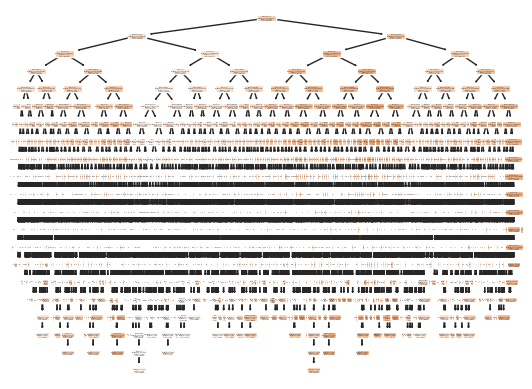

In [45]:
from sklearn.tree import plot_tree

plot_tree(reg, filled=True, proportion=True)
plt.show()

## Performance evaluation

In [46]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [47]:
y_pred = reg.predict(x_test)

In [48]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r_squared = r2_score(y_test, y_pred)
rmse = np.sqrt(mse)

print(f"MAE: {mae}")
print(f"MSE: {mse}")
print(f"RSQUARED: {r_squared}")
print(f"RMSE: {rmse}")

MAE: 436.3039393939394
MSE: 314006.9821212121
RSQUARED: 0.9668277413049481
RMSE: 560.3632590750505


Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


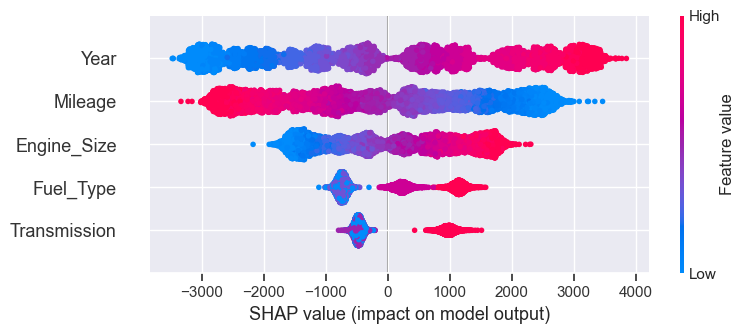

In [49]:
import shap

explainer = shap.TreeExplainer(reg, x)
shap_values = explainer(x, check_additivity=False)
shap.summary_plot(shap_values, 
                  x, 
                  max_display=x.shape[1], 
                  feature_names=list(x.columns),
                  # show=False)
                 )

# plt.savefig('ex.png', dpi=200, bbox_inches='tight')

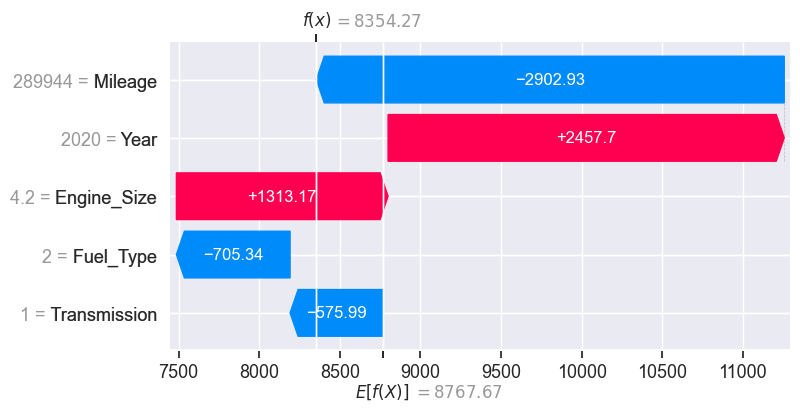

In [50]:
shap.plots.waterfall(shap_values[0], 
                     # show=False
                    )

# plt.savefig('ex.png', dpi=200, bbox_inches='tight')